In [3]:
import sqlite3
import pandas as pd
con = sqlite3.connect('chinook.db')
cursor = con.cursor()
sql1 = "SELECT trackid,tracks.name,albums.Title AS album, media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId;"
cursor.execute(sql1)
con.commit()
result = cursor.fetchall()
df = pd.DataFrame(result, columns=[ 
'track_id','track_name','album_title','media_type','genres'
  ])
df

,track_id,track_name,album_title,media_type,genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


In [4]:
df.to_sql('top_10_genres', con, if_exists='replace', index = False) 

In [5]:
sql2 = "SELECT genres, COUNT(*) FROM top_10_genres GROUP BY genres ORDER BY COUNT(*) DESC"
df = pd.read_sql_query(sql2,con)
df

,genres,COUNT(*)
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


<ipython-input-6-a407354432be>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


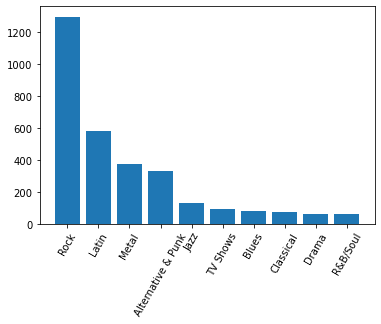

In [6]:
from matplotlib import pyplot as plt
genres = df['genres'][:10].values.tolist()
counts = df['COUNT(*)'][:10].values.tolist()
plt.bar(range(len(genres)),counts)
ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(genres, rotation=60)
plt.show()

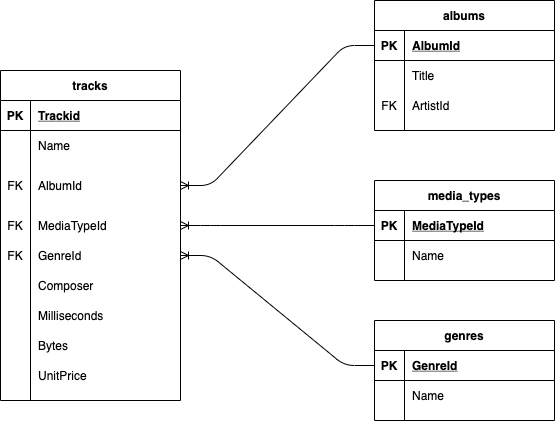